In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
name = "test-latency2"

df_prob = pd.read_csv(f'data/{name}-prob.log')
df_basic = pd.read_csv(f'data/{name}-basic.log')

In [24]:
# Print the size of the df
print(df_prob.shape)
print(df_basic.shape)

(3690, 17)
(3690, 17)


In [25]:
df_prob.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1674743760680,1621,HTTP Request 2,200,OK,ThreadGroup2 2-1,text,True,NaN,429,274,3,3,http://10.10.1.2:1323/invoke/hash,1611,0,35
1,1674743761939,633,HTTP Request 2,200,OK,ThreadGroup2 2-3,text,True,NaN,405,274,3,3,http://10.10.1.2:1323/invoke/hash,633,0,1
2,1674743762330,317,HTTP Request 2,200,OK,ThreadGroup2 2-4,text,True,NaN,413,274,2,2,http://10.10.1.2:1323/invoke/hash,317,0,1
3,1674743761569,1286,HTTP Request 2,200,OK,ThreadGroup2 2-2,text,True,NaN,413,274,1,1,http://10.10.1.2:1323/invoke/hash,1286,0,1
4,1674743765029,304,HTTP Request 2,200,OK,ThreadGroup2 2-7,text,True,NaN,402,274,3,3,http://10.10.1.2:1323/invoke/hash,304,0,1


In [26]:
# Filter df based on response code
success_prob = df_prob[df_prob['responseCode'] == 200]
success_basic = df_basic[df_basic['responseCode'] == 200]

failure_prob = df_prob[df_prob['responseCode'] != 200]
failure_basic = df_basic[df_basic['responseCode'] != 200]

In [27]:
# Get the mean latency for successfull df
mean_latency_prob = success_prob['Latency'].mean()
mean_latency_basic = success_basic['Latency'].mean()
print(f"Mean latency prob: {mean_latency_prob}")
print(f"Mean latency basic: {mean_latency_basic}")

Mean latency prob: 735.7753387533876
Mean latency basic: 1253.6482384823848


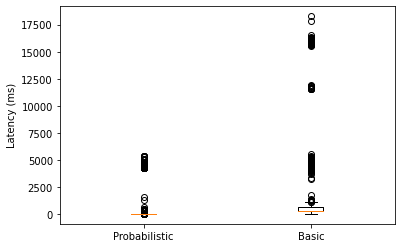

In [28]:
# Box plot for latency
plt.boxplot([success_prob['Latency'], success_basic['Latency']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Latency (ms)')
plt.show()

In [29]:
filtered_prob_t1 = success_prob[success_prob['threadName'].str.contains("ThreadGroup1", na=False)]
filtered_prob_t2 = success_prob[success_prob['threadName'].str.contains('ThreadGroup2', na=False)]
filtered_basic_t1 = success_basic[success_basic['threadName'].str.contains('ThreadGroup1', na=False)]
filtered_basic_t2 = success_basic[success_basic['threadName'].str.contains('ThreadGroup2', na=False)]

In [30]:
#Get only Url
url_1 = filtered_prob_t1['URL'].iloc[0]
fun_name_1 = url_1.split('/')[4]
print(f"Function 1: {fun_name_1}")
if filtered_basic_t2.size > 0:
    url_2 = filtered_basic_t2['URL'].iloc[0]
    fun_name_2 = url_2.split('/')[4]
    print(f"Function 2: {fun_name_2}")

Function 1: fib
Function 2: hash


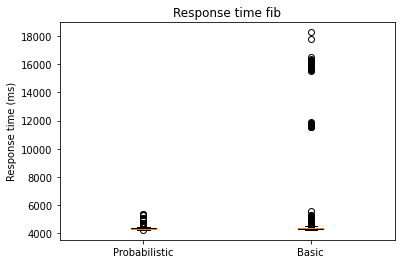

In [31]:
plt.show()
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
plt.show()

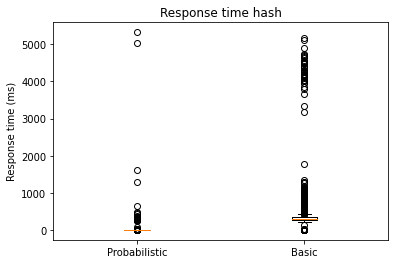

In [32]:
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
plt.show()